In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from utide._ut_constants import ut_constants as utide
import os
from utils import *
import pandas as pd
import cartopy.feature as cfeature
import xesmf as xe
from scipy.ndimage import gaussian_filter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from palette import *
import statsmodels.api as sm


# useful variables
j=np.complex(0,1)
cpd=2.*np.pi/86400. # from cpd to radian/s
crs = ccrs.PlateCarree() # cartopy


#datadir = './'
datadir = '/home7/pharos/othr/cgonzale/data/iwsst_mit/'
datadir_out = '/home7/pharos/othr/cgonzale/data/iwsst_mit/working/'
graphdir = '/home3/homedir7/perso/cgonzale/IWAVE/figures/'
bathy = '/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc'
datadir_tides = '/home2/pharos/othr/aponte/tides/HRET/'
datadir_tides2 = '/home2/pharos/othr/aponte/tides/FES2014/'
# tmp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

palette = '/home3/homedir7/perso/cgonzale/IWAVE/script/palette/medspiration.rgb'
csst = getColorMap( rgbFile = palette )

/home/lervily/cgonzale/miniconda3/envs/iwsst/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
Region = 'AustraliaHW'
if(Region == 'AustraliaHW'):
    fregion = 'nwa_'
elif (Region == 'Mozamb2'):
    fregion = 'mad_'

In [3]:
file='nwa_SST.nc'
dsSST = xr.open_dataset(datadir+file)
file = 'nwa_Eta.nc'
dsSSH = xr.open_dataset(datadir+file)

In [4]:
print(dsSST)

<xarray.Dataset>
Dimensions:  (i: 2000, j: 2000, time: 24)
Coordinates:
  * i        (i) int64 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
  * j        (j) int64 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 ...
    face     int64 ...
    XC       (j, i) float32 ...
    YC       (j, i) float32 ...
    rA       (j, i) float32 ...
    Depth    (j, i) float32 ...
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 5.717e+06 ...
Data variables:
    SST      (time, j, i) float32 ...


In [5]:
print(dsSSH)

<xarray.Dataset>
Dimensions:  (i: 2000, j: 2000, time: 24)
Coordinates:
  * i        (i) int64 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
  * j        (j) int64 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 ...
    face     int64 ...
    XC       (j, i) float32 ...
    YC       (j, i) float32 ...
    rA       (j, i) float32 ...
    Depth    (j, i) float32 ...
  * time     (time) float64 2.592e+05 2.628e+05 2.664e+05 2.7e+05 2.736e+05 ...
Data variables:
    Eta      (time, j, i) float32 ...


In [6]:
print(dsSSH['face'].values,dsSSH['Depth'].values)

4 [[3983.2864  3996.0232  4003.482   ... 5665.9214  5635.822   5601.0503 ]
 [3994.6348  4010.8645  4020.4639  ... 5629.984   5590.38    5550.3906 ]
 [4003.358   4022.9739  4035.0986  ... 5584.0195  5535.4004  5490.991  ]
 ...
 [4674.88    4674.88    4674.88    ...  857.54535  865.48883  859.20404]
 [4674.88    4674.88    4674.88    ...  830.0891   833.97     833.97   ]
 [4674.88    4674.88    4674.88    ...  808.78595  817.22925  813.5204 ]]


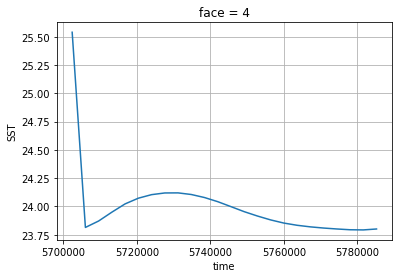

In [7]:
Tmean_xy = dsSST['SST'].mean(dim=['i','j'])
Tmean_xy.plot()
plt.grid()

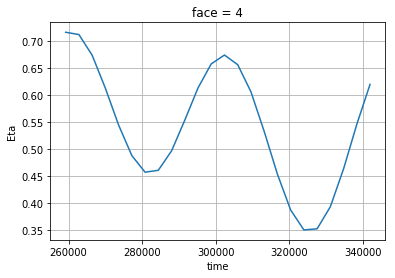

In [8]:
Eta_mean_xy = dsSSH['Eta'].mean(dim=['i','j'])
Eta_mean_xy.plot()
plt.grid()

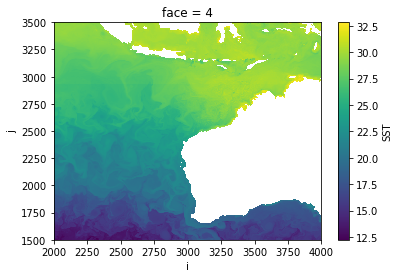

In [9]:

sst2d_t = dsSST['SST']
temp_mean = sst2d_t.mean(dim='time')
temp_mean.plot()

In [10]:
print(sst2d_t)

<xarray.DataArray 'SST' (time: 24, j: 2000, i: 2000)>
array([[[12.756156, 12.77731 , ..., 15.116667, 15.181519],
        [12.524323, 12.55107 , ..., 15.24956 , 15.320652],
        ...,
        [34.17273 , 34.177032, ..., 33.948315, 33.946346],
        [33.891827, 33.89133 , ..., 34.074482, 34.071262]],

       [[12.819076, 12.831769, ..., 15.146022, 15.207104],
        [12.613521, 12.647764, ..., 15.279584, 15.341853],
        ...,
        [29.193485, 29.18575 , ..., 30.37877 , 30.398466],
        [29.188526, 29.182808, ..., 30.318254, 30.31909 ]],

       ...,

       [[12.398623, 12.348524, ..., 15.404916, 15.414626],
        [12.561037, 12.500916, ..., 15.4135  , 15.439696],
        ...,
        [29.214285, 29.215242, ..., 30.253288, 30.248358],
        [29.210724, 29.209286, ..., 30.271198, 30.236656]],

       [[12.373815, 12.332017, ..., 15.444862, 15.444381],
        [12.527854, 12.466077, ..., 15.458282, 15.478375],
        ...,
        [29.210253, 29.210632, ..., 30.261705, 30

In [11]:
aSST = sst2d_t - temp_mean

In [12]:
file_out = datadir_out+fregion+'SST_anomaly.nc'
#ds.isel(time=slice(0,24), face=1).to_netcdf(file_out, mode='w', unlimited_dims='time') # not working, weird incompatible chunk error
aSST.isel(time=slice(0,24)).to_netcdf(file_out, mode='w', unlimited_dims='time')

In [13]:
print(aSST)

<xarray.DataArray 'SST' (time: 24, j: 2000, i: 2000)>
array([[[ 0.114261,  0.173466, ..., -0.227106, -0.192721],
        [-0.224233, -0.181932, ..., -0.129759, -0.099777],
        ...,
        [ 4.643469,  4.648453, ...,  3.278967,  3.269655],
        [ 4.369329,  4.376154, ...,  3.39588 ,  3.411531]],

       [[ 0.17718 ,  0.227924, ..., -0.197751, -0.167136],
        [-0.135035, -0.085238, ..., -0.099735, -0.078576],
        ...,
        [-0.335775, -0.342831, ..., -0.290577, -0.278225],
        [-0.333971, -0.332369, ..., -0.360348, -0.340641]],

       ...,

       [[-0.243273, -0.255321, ...,  0.061143,  0.040386],
        [-0.187518, -0.232086, ...,  0.034181,  0.019267],
        ...,
        [-0.314976, -0.313337, ..., -0.416059, -0.428333],
        [-0.311773, -0.305891, ..., -0.407404, -0.423075]],

       [[-0.268081, -0.271828, ...,  0.101089,  0.070141],
        [-0.220701, -0.266926, ...,  0.078963,  0.057946],
        ...,
        [-0.319008, -0.317947, ..., -0.407642, -0

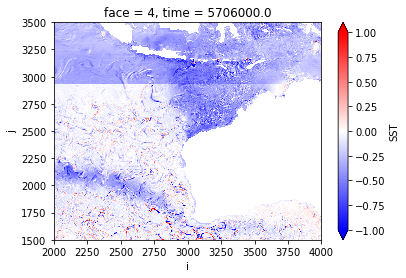

In [14]:
asst2d_1 = aSST.isel(time=1)
asst2d_1.plot(vmin=-1,vmax=1,cmap = 'bwr')

In [15]:
print(asst2d_1)

<xarray.DataArray 'SST' (j: 2000, i: 2000)>
array([[ 0.17718 ,  0.227924,  0.262986, ..., -0.220024, -0.197751, -0.167136],
       [-0.135035, -0.085238, -0.039334, ..., -0.138708, -0.099735, -0.078576],
       [-0.272994, -0.268652, -0.256706, ..., -0.009433, -0.025349, -0.047432],
       ...,
       [-0.319759, -0.326466, -0.329618, ..., -0.212391, -0.24416 , -0.241728],
       [-0.335775, -0.342831, -0.342775, ..., -0.236179, -0.290577, -0.278225],
       [-0.333971, -0.332369, -0.331417, ..., -0.305687, -0.360348, -0.340641]],
      dtype=float32)
Coordinates:
  * i        (i) int64 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
  * j        (j) int64 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 ...
    face     int64 4
    XC       (j, i) float32 93.677086 93.697914 93.71875 93.739586 93.760414 ...
    YC       (j, i) float32 -37.354095 -37.354095 -37.354095 -37.354095 ...
    rA       (j, i) float32 3131735.2 3131735.2 3131735.2 3131735.2 ...
    Depth    (j, i) float

<xarray.DataArray 'SST' (j: 2000, i: 2000)>
array([[12.756156, 12.77731 , 12.788099, ..., 15.071752, 15.116667, 15.181519],
       [12.524323, 12.55107 , 12.571043, ..., 15.163332, 15.24956 , 15.320652],
       [12.407132, 12.410295, 12.414683, ..., 15.311929, 15.365752, 15.391726],
       ...,
       [33.911385, 33.913036, 33.913826, ..., 34.16682 , 34.173622, 34.17979 ],
       [34.17273 , 34.177032, 34.17687 , ..., 33.950703, 33.948315, 33.946346],
       [33.891827, 33.89133 , 33.891037, ..., 34.0923  , 34.074482, 34.071262]],
      dtype=float32)
Coordinates:
  * i        (i) int64 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
  * j        (j) int64 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 ...
    face     int64 ...
    XC       (j, i) float32 ...
    YC       (j, i) float32 ...
    rA       (j, i) float32 ...
    Depth    (j, i) float32 ...
    time     float64 5.702e+06


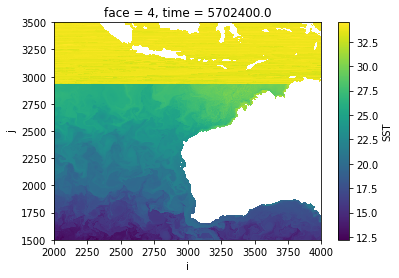

In [16]:
sst2d0 = dsSST['SST'].isel(time=0)
print(sst2d0)
sst2d0.plot()

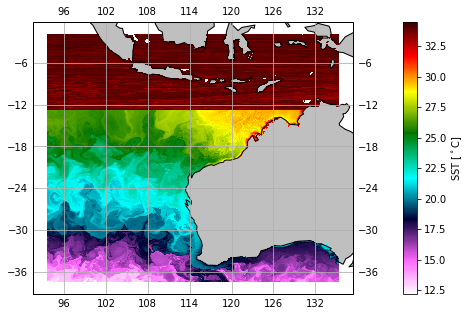

In [17]:
fig1=plt.figure(figsize=(9, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
hdl = ax.pcolormesh(sst2d0.XC,sst2d0.YC,sst2d0, \
                transform = ccrs.PlateCarree(),cmap=csst)
ax.coastlines(resolution='110m', color ='k' )
ax.add_feature(cfeature.LAND, facecolor = '0.75')
ax.gridlines(draw_labels = True)
cb = plt.colorbar(hdl,ax=ax,pad = 0.1)
cb.set_label('SST [$^\circ$C]')

In [18]:
lonmin_w =107
lonmax_w = 113
latmin_w = -35
latmax_w = -27
latmin_w2 = -31
x_WAUST = [lonmin_w, lonmax_w, lonmax_w, lonmin_w, lonmin_w]
y_WAUST = [latmin_w, latmin_w, latmax_w, latmax_w, latmin_w]
x_WAUST2 = [lonmin_w, lonmax_w, lonmax_w, lonmin_w, lonmin_w]
y_WAUST2 = [latmin_w2, latmin_w2, latmax_w, latmax_w, latmin_w2]

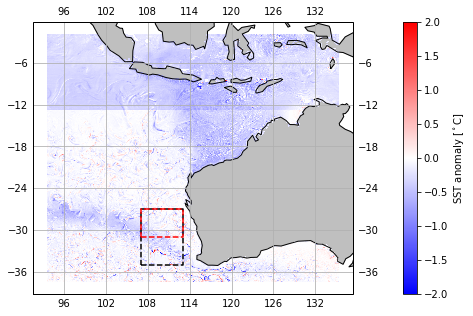

In [19]:
fig1=plt.figure(figsize=(9, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
hdl = ax.pcolormesh(asst2d_1.XC,asst2d_1.YC,asst2d_1, \
                transform = ccrs.PlateCarree(),cmap='bwr',vmin =-2,vmax=2)
ax.coastlines(resolution='110m', color ='k' )
ax.plot(x_WAUST, y_WAUST, transform=ccrs.PlateCarree(), color='black',linestyle='dashed')
ax.plot(x_WAUST2, y_WAUST2, transform=ccrs.PlateCarree(), color='red',linestyle='dashed')
ax.add_feature(cfeature.LAND, facecolor = '0.75')
ax.gridlines(draw_labels = True)
cb = plt.colorbar(hdl,ax=ax,pad = 0.1)
cb.set_label('SST anomaly [$^\circ$C]')

---

## Load HRET for whole domain

In [20]:
latmin_f4 = -37
latmax_f4 = - 1
lonmin_f4 = 97
lonmax_f4 = 137

In [21]:
#read tides
hret, constituents, omega = get_hret_ssh(constituents=['M2'], lonb=(lonmin_f4, lonmax_f4), latb=(latmin_f4, latmax_f4), hret=datadir_tides+'/Carrere_HRET_testing.nc',bathy=bathy)
print(hret)

M2 omega=1.405189e-04 rad/s, 1.932 cpd
/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc
<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 801)
Coordinates:
  * longitude  (longitude) float64 97.0 97.05 97.1 97.15 97.2 97.25 97.3 ...
  * latitude   (latitude) float64 -37.0 -36.95 -36.9 -36.85 -36.8 -36.75 ...
Data variables:
    M2re       (latitude, longitude) float64 dask.array<shape=(720, 801), chunksize=(420, 60)>
    M2im       (latitude, longitude) float64 dask.array<shape=(720, 801), chunksize=(420, 60)>
    mask       (latitude, longitude) float64 dask.array<shape=(720, 801), chunksize=(420, 60)>
    h          (latitude, longitude) float64 4.434e+03 4.392e+03 4.373e+03 ...
Attributes:
    history:                  merged txa/j1a/j2a, txb/j1b, g1a, and e2a/n1b/s...
    resolution:               The spatial basis function coefficients are def...
    creator:                  Ed Zaron, ezaron@pdx.edu
    post-processing scripts:  baburu:NASA-Tides/Julia/; this file was wri

In [22]:
U, V, constituents, omega = get_hret_uv(constituents=['M2','K1'], lonb=(lonmin_f4, lonmax_f4), latb=(latmin_f4, latmax_f4), hret=datadir_tides+'/Carrere_HRET_testing.nc', bathy=bathy)

K1 omega=7.292116e-05 rad/s, 1.003 cpd
M2 omega=1.405189e-04 rad/s, 1.932 cpd
/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc
7.292116514526208e-05


In [23]:
cst = 'M2'
hc = 1000
toplt_U = np.sqrt(V[cst].real**2+V[cst].real**2)
toplt_U = toplt_U.where(hret['h']>hc)
lons,lats = np.meshgrid(hret.longitude,hret.latitude)
print(toplt_U)

<xarray.DataArray (latitude: 719, longitude: 800)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 4.119201e-03, 4.326993e-03, ..., 1.336510e-03,
        9.880858e-05, 7.129325e-04],
       [         nan, 4.808143e-03, 5.001314e-03, ..., 1.654333e-03,
        3.574819e-04, 6.472484e-04],
       ...,
       [         nan, 1.800780e-03, 1.817299e-03, ...,          nan,
                 nan,          nan],
       [         nan, 1.901474e-03, 1.331631e-03, ..., 3.745500e-03,
        3.278486e-03, 2.487833e-03],
       [         nan, 5.543577e-03, 4.784620e-03, ..., 2.261302e-03,
        1.556742e-03, 3.907269e-04]])
Coordinates:
  * latitude   (latitude) float64 -37.0 -36.95 -36.9 -36.85 -36.8 -36.75 ...
  * longitude  (longitude) float64 97.0 97.05 97.1 97.15 97.2 97.25 97.3 ...


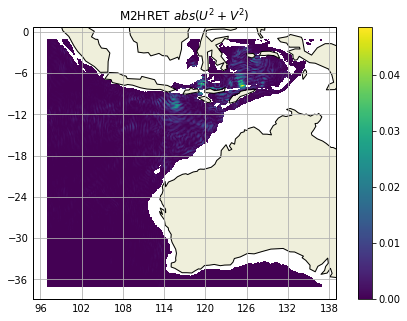

In [24]:
cst = 'M2'
hc=1000.

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection=crs)

#
toplt = np.abs(U['M2']**2+V['M2']**2)
toplt = toplt.where(hret['h']>hc)
toplt.plot()
ax.set_title(cst+r'HRET $abs(U^2+V^2)$')
gl = ax.gridlines(crs=crs, draw_labels=True) 
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
ax.add_feature(cfeature.LAND)

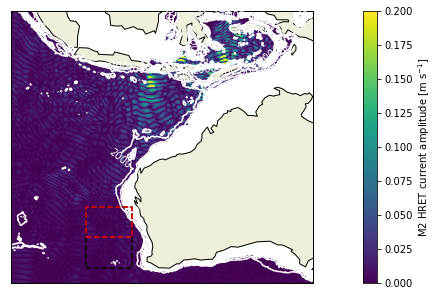

In [25]:
pad = 0.1
img_extent_f4 = (lonmin_f4, lonmax_f4, latmin_f4, latmax_f4)
fig1=plt.figure(figsize=(9, 5))
ax1 = plt.axes(projection=ccrs.PlateCarree())
#ax1 = make_cartopy(1,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=2)
cs = ax1.pcolormesh(lons,lats,toplt_U, \
                transform = ccrs.PlateCarree(),vmax=0.2)

levels=[100,1000,2000]
ccont = ax1.contour(lons,lats,hret['h'],levels, extent=img_extent_f4, transform=ccrs.PlateCarree(),colors='w')
ax1.plot(x_WAUST, y_WAUST, transform=ccrs.PlateCarree(), color='black',linestyle='dashed')
ax1.plot(x_WAUST2, y_WAUST2, transform=ccrs.PlateCarree(), color='red',linestyle='dashed')
plt.clabel(ccont, inline=1, fontsize=10,fmt='%.0f')
ax1.coastlines()
ax1.add_feature(cfeature.LAND)
cbar = fig.colorbar(cs, ax=ax1, pad=pad)
cbar.set_label(cst+r' HRET current amplitude [m s$^{-1}$]')

In [26]:
if (Region == 'AustraliaHW'):
    latmin_z = -22 #-14,-13
    latmax_z = -13#-12, -7
    lonmin_z =  114#52,49
    lonmax_z =  124#55,53
    vmin = 22
    vmax = 29
    vmax_grad = 0.1
    vmax_tw=0.05
    it=1
   

toplt_zoom = sst2d_t.where(sst2d_t['XC']>=lonmin_z, drop=True)
toplt_zoom = toplt_zoom.where(toplt_zoom['XC']<=lonmax_z, drop=True)
toplt_zoom = toplt_zoom.where(toplt_zoom['YC']<=latmax_z, drop=True)
toplt_zoom = toplt_zoom.where(toplt_zoom['YC']>=latmin_z, drop=True)

img_extent = (lonmin_z, lonmax_z, latmin_z, latmax_z)

In [27]:
print(toplt_zoom)

<xarray.DataArray (time: 24, j: 492, i: 480)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [27.733229, 27.737581, ..., 29.801277, 29.74982 ],
        [27.73581 , 27.751154, ..., 29.702158, 29.711277]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [27.846193, 27.838552, ..., 29.865963, 29.827713],
        [27.84388 , 27.8439  , ..., 29.794321, 29.804392]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [27.685488, 27.700998, ..., 29.57762 , 29.63885 ],
        [27.744642, 27.74565 , ..., 29.58384 , 29.664713]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [27.723448, 27.743748, ..., 29.602016, 29.65615 ]

In [28]:
temp_mean = toplt_zoom.mean(dim='time')
aSST = toplt_zoom - temp_mean
sst_t = toplt_zoom.sel(i=2985,j=2436)
print(sst_t)

<xarray.DataArray (time: 24)>
array([24.055517, 24.067509, 24.151321, 24.278528, 24.360811, 24.407461,
       24.440275, 24.468016, 24.498232, 24.535961, 24.516396, 24.418926,
       24.309586, 24.246052, 24.283718, 24.403872, 24.45598 , 24.41572 ,
       24.375277, 24.352282, 24.339561, 24.333603, 24.342731, 24.35208 ],
      dtype=float32)
Coordinates:
    i        int64 2985
    j        int64 2436
    face     int64 4
    XC       float32 114.197914
    YC       float32 -21.823694
    rA       float32 4250071.0
    Depth    float32 5.998369
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 5.717e+06 ...


In [29]:
len(sst_t)

24

In [30]:
from pandas import DataFrame, DatetimeIndex
print(len(DatetimeIndex(start='1/1/1951', periods=len(sst_t),freq='H')))

24


In [31]:

data = DataFrame(sst_t.values, DatetimeIndex(start='1/1/1951', periods=len(sst_t),freq='H'))

In [32]:
from statsmodels.tsa.tsatools import freq_to_period
_pandas_wrapper, pfreq = _maybe_get_pandas_wrapper_freq(data)
print(pfreq)

NameError: name '_maybe_get_pandas_wrapper_freq' is not defined

In [ ]:

decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

In [33]:
def linear_trend(x):
    pf = np.polyfit(x.time, x, 1)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(pf[0])

# stack lat and lon into a single dimension called allpoints
stacked = aSST.stack(allpoints=['i','j'])
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
trend_unstacked = trend.unstack('allpoints')

In [34]:
print(trend)

<xarray.DataArray (allpoints: 236160)>
array([          nan,           nan,           nan, ..., -8.953038e-06,
       -7.907453e-06, -6.692468e-06])
Coordinates:
    face       int64 4
    XC         (allpoints) float32 114.010414 114.010414 114.010414 ...
    YC         (allpoints) float32 -21.983612 -21.965853 -21.948092 ...
    rA         (allpoints) float32 4240484.5 4241551.5 4242618.0 4243684.0 ...
    Depth      (allpoints) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 19.31 ...
  * allpoints  (allpoints) MultiIndex
  - i          (allpoints) int64 2976 2976 2976 2976 2976 2976 2976 2976 ...
  - j          (allpoints) int64 2427 2428 2429 2430 2431 2432 2433 2434 ...


In [35]:
print(stacked)

<xarray.DataArray (time: 24, allpoints: 236160)>
array([[      nan,       nan,       nan, ..., -0.263411, -0.318836, -0.367601],
       [      nan,       nan,       nan, ..., -0.20495 , -0.240944, -0.274487],
       [      nan,       nan,       nan, ..., -0.095285, -0.116234, -0.141344],
       ...,
       [      nan,       nan,       nan, ..., -0.446896, -0.411989, -0.392967],
       [      nan,       nan,       nan, ..., -0.458168, -0.429808, -0.414165],
       [      nan,       nan,       nan, ..., -0.440844, -0.412506, -0.392706]],
      dtype=float32)
Coordinates:
    face       int64 4
    XC         (allpoints) float32 114.010414 114.010414 114.010414 ...
    YC         (allpoints) float32 -21.983612 -21.965853 -21.948092 ...
    rA         (allpoints) float32 4240484.5 4241551.5 4242618.0 4243684.0 ...
    Depth      (allpoints) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 19.31 ...
  * time       (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 ...
  * allpoints  (allpoints) M

In [36]:

def get_tide_ha(v,  omega=[1.405189e-04], Twin=5):
    """ Extract the tidal signal with a harmonic analysis on a sliding window
    The fit looks like: v = v0 + v1 x time + sum( vi_c cos(omega x time) + vi_s sin(omega x time))
    omega M2 = 1.405189e-04 rad/s
    """
    
    # generate the sliding window
    dt = v.time[1]-v.time[0]
    twin = np.arange(-Twin*.5,Twin*.5+dt,dt)
    # find the central point of the window
    i0 = np.where(np.abs(twin)<=1e-10)[0][0]
    X = np.hstack((np.ones_like(twin)[:,None],twin[:,None]*2./Twin))
    #X = np.hstack((np.ones_like(twin)[:,None],np.random.randn(twin.size)[:,None]))
    for lomega in omega:
        X = np.hstack((X,np.cos(2.*np.pi*lomega*twin[:,None]),np.sin(2.*np.pi*lomega*twin[:,None])))
    
    if False:
        plt.figure()
        plt.plot(twin, X)
        plt.ylim(-1.1,1.1)
        plt.xlabel('time [days]')
        plt.title('window fit functions')
        plt.grid()
        plt.show()
    
    # convolve the original time series with fit functions
    Xc =[]
    for i in range(X.shape[1]):
        Xc.append(np.convolve( v, X[:,i], mode='same'))
    # normalize and correct for cross-correlations
    M = np.linalg.inv(X.transpose().dot(X))
    m = M.dot(np.array(Xc))
    
    #print m.shape, X.shape, M.shape
    #V = m.transpose() * X[i0,:].transpose()
    V = X[i0,:]*m.transpose() # watch out for the broadcast

    # separates low and tidal parts
    v_tide = np.sum(V[:,2:], axis=1)
    v_slow = V[:,0]+V[:,1]
    
    return V, v_tide, v_slow

In [37]:
dt = toplt_zoom.time[1]-toplt_zoom.time[0]
Twin = 5
twin = np.arange(-Twin*.5,Twin*.5+dt,dt)
twin

array([-2.5000e+00,  3.5975e+03])

In [38]:
# stack lat and lon into a single dimension called allpoints
stacked = toplt_zoom.stack(allpoints=['i','j'])
# apply the function over allpoints to calculate the trend at each point
trend = stacked.groupby('allpoints').apply(get_tide_ha)
# unstack back to lat lon coordinates
trend_unstacked = trend.unstack('allpoints')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [39]:
trend_sel = trend_unstacked.sel(i=2985,j=2436)
temp_mean_pair = temp_mean.sel(i=2985,j=2436)
print(trend_sel,temp_mean_pair)
print(toplt_zoom.time[23]/(3600*24))

<xarray.DataArray ()>
array(1.610464e-06)
Coordinates:
    face     int64 4
    XC       float32 114.197914
    YC       float32 -21.823694
    rA       float32 4250071.0
    Depth    float32 5.998369
    i        int64 2985
    j        int64 2436 <xarray.DataArray ()>
array(24.350393, dtype=float32)
Coordinates:
    i        int64 2985
    j        int64 2436
    face     int64 4
    XC       float32 114.197914
    YC       float32 -21.823694
    rA       float32 4250071.0
    Depth    float32 5.998369
<xarray.DataArray 'time' ()>
array(66.958333)
Coordinates:
    face     int64 4
    time     float64 5.785e+06


In [40]:
print('Hour',toplt_zoom.time/(3600))

Hour <xarray.DataArray 'time' (time: 24)>
array([1584., 1585., 1586., 1587., 1588., 1589., 1590., 1591., 1592., 1593.,
       1594., 1595., 1596., 1597., 1598., 1599., 1600., 1601., 1602., 1603.,
       1604., 1605., 1606., 1607.])
Coordinates:
    face     int64 4
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 5.717e+06 ...


In [41]:
print('day',toplt_zoom.time/(3600*24))

day <xarray.DataArray 'time' (time: 24)>
array([66.      , 66.041667, 66.083333, 66.125   , 66.166667, 66.208333,
       66.25    , 66.291667, 66.333333, 66.375   , 66.416667, 66.458333,
       66.5     , 66.541667, 66.583333, 66.625   , 66.666667, 66.708333,
       66.75    , 66.791667, 66.833333, 66.875   , 66.916667, 66.958333])
Coordinates:
    face     int64 4
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 5.713e+06 5.717e+06 ...


In [42]:
66*24

1584

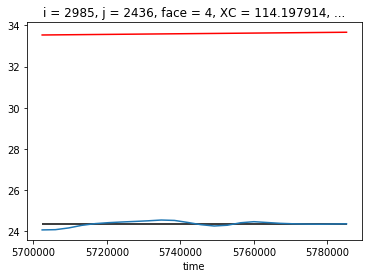

In [43]:
sst_point = toplt_zoom.sel(i=2985,j=2436)
sst_point.plot()
plt.plot(toplt_zoom.time,toplt_zoom.time*trend_sel+temp_mean_pair,c='r')
plt.hlines(y=temp_mean_pair,xmin = toplt_zoom.time[0],xmax=toplt_zoom.time[-1])

In [46]:
print (toplt_zoom)

<xarray.DataArray (time: 24, j: 492, i: 480)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [27.733229, 27.737581, ..., 29.801277, 29.74982 ],
        [27.73581 , 27.751154, ..., 29.702158, 29.711277]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [27.846193, 27.838552, ..., 29.865963, 29.827713],
        [27.84388 , 27.8439  , ..., 29.794321, 29.804392]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [27.685488, 27.700998, ..., 29.57762 , 29.63885 ],
        [27.744642, 27.74565 , ..., 29.58384 , 29.664713]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [27.723448, 27.743748, ..., 29.602016, 29.65615 ]

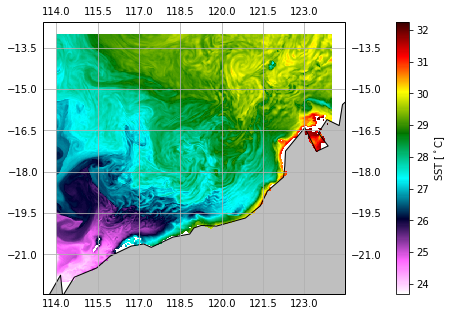

In [47]:
fig1=plt.figure(figsize=(9, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
hdl = ax.pcolormesh(toplt_zoom.XC,toplt_zoom.YC,toplt_zoom[1,:,:], \
                transform = ccrs.PlateCarree(),cmap=csst)
ax.coastlines(resolution='110m', color ='k' )
ax.add_feature(cfeature.LAND, facecolor = '0.75')
ax.gridlines(draw_labels = True)
cb = plt.colorbar(hdl,ax=ax,pad = 0.1)
cb.set_label('SST [$^\circ$C]')

In [48]:
dlon = toplt_zoom['XC'].diff('i').mean()#ni
dlat = toplt_zoom['YC'].diff('j').mean()#nj

In [49]:
R_earth = 6378100 #earth radius m
deg2rad = np.pi/180
R_conv = R_earth*deg2rad
print(R_conv)

dy = (dlat*R_conv)
dx = dlon*R_conv*np.cos(deg2rad*toplt_zoom['YC'].mean())

dx = dx.values
dy = dy.values

print(dlon, dlat)
print(dx,dy)

111318.84502145034
<xarray.DataArray 'XC' ()>
array(0.020832)
Coordinates:
    face     int64 4 <xarray.DataArray 'YC' ()>
array(0.018246)
Coordinates:
    face     int64 4
2211.2182386807194 2031.1446587847252


In [51]:
sobel_y, sobel_x = sobel_gradient(toplt_zoom[1,:,:], dx, dy)
sobel_grad =  np.sqrt(sobel_x**2+sobel_y**2)

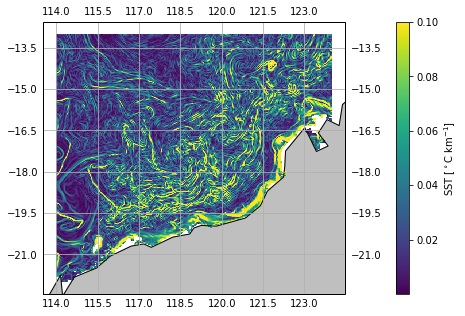

In [52]:
fig1=plt.figure(figsize=(9, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
hdl = ax.pcolormesh(toplt_zoom.XC,toplt_zoom.YC,sobel_grad*1000, \
                transform = ccrs.PlateCarree(),vmax=vmax_grad)
ax.coastlines(resolution='110m', color ='k' )
ax.add_feature(cfeature.LAND, facecolor = '0.75')
ax.gridlines(draw_labels = True)
cb = plt.colorbar(hdl,ax=ax,pad = 0.1)
cb.set_label('SST [$^\circ$C km$^{-1}$]')

---


# Load HRET currents

In [53]:
#read tides
hret, constituents, omega = get_hret_ssh(constituents=['M2'], lonb=(lonmin_z, lonmax_z), latb=(latmin_z, latmax_z), hret=datadir_tides+'/Carrere_HRET_testing.nc',bathy=bathy)
print(hret)

M2 omega=1.405189e-04 rad/s, 1.932 cpd
/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc
<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 201)
Coordinates:
  * longitude  (longitude) float64 114.0 114.1 114.1 114.2 114.2 114.2 114.3 ...
  * latitude   (latitude) float64 -22.0 -21.95 -21.9 -21.85 -21.8 -21.75 ...
Data variables:
    M2re       (latitude, longitude) float64 dask.array<shape=(180, 201), chunksize=(120, 201)>
    M2im       (latitude, longitude) float64 dask.array<shape=(180, 201), chunksize=(120, 201)>
    mask       (latitude, longitude) float64 dask.array<shape=(180, 201), chunksize=(120, 201)>
    h          (latitude, longitude) float64 -51.5 -6.001 -9.999 11.0 18.5 ...
Attributes:
    history:                  merged txa/j1a/j2a, txb/j1b, g1a, and e2a/n1b/s...
    resolution:               The spatial basis function coefficients are def...
    creator:                  Ed Zaron, ezaron@pdx.edu
    post-processing scripts:  baburu:NASA-Tides/Julia/; this file 

In [54]:
U, V, constituents, omega = get_hret_uv(constituents=['M2','K1'], lonb=(lonmin_z, lonmax_z), latb=(latmin_z, latmax_z), hret=datadir_tides+'/Carrere_HRET_testing.nc', bathy=bathy)

K1 omega=7.292116e-05 rad/s, 1.003 cpd
M2 omega=1.405189e-04 rad/s, 1.932 cpd
/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc
7.292116514526208e-05


---

### Regridding data

In [55]:
latitude_tides = U['latitude']
longitude_tides = U['longitude']

print(latitude_tides.shape)
print(longitude_tides.shape)

(179,)
(200,)


In [56]:
lat_sst = toplt_zoom.YC[:,0]
lon_sst = toplt_zoom.XC[0,:]
print(lat_sst.shape)
print(lon_sst.shape)

(492,)
(480,)


In [57]:
#Regriding tides data
# output grid has a larger coverage and finer resolution
grid_in = {'lon': longitude_tides,
            'lat': latitude_tides
           }

grid_out = {'lon': lon_sst,
            'lat': lat_sst
           }

In [58]:
#perform regridding
regridder = xe.Regridder(grid_in, grid_out, 'bilinear')
regridder.clean_weight_file()
regridder

Create weight file: bilinear_179x200_492x480.nc
Remove file bilinear_179x200_492x480.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_179x200_492x480.nc 
Reuse pre-computed weights? False 
Input grid shape:           (179, 200) 
Output grid shape:          (492, 480) 
Output grid dimension name: ('j', 'i') 
Periodic in longitude?      False

In [59]:
cst = 'M2'
U_out = regridder(U[cst])  # regrid a basic numpy array
V_out = regridder(V[cst]) 

In [60]:
Tc = (U_out*sobel_x+V_out*sobel_y)/(j*omega['M2']*cpd)

In [61]:
lons,lats = np.meshgrid(hret.longitude,hret.latitude)

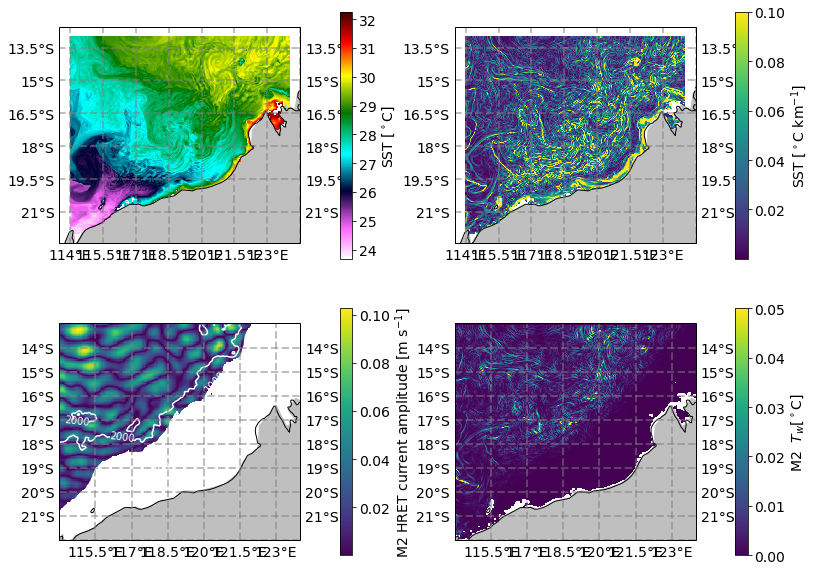

In [63]:
matplotlib.rcParams.update({'font.size': 14})
hc = 1000
pad = 0.12
fig = plt.figure(figsize=(13,10))
#plot SST
ax = make_cartopy(2,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1)
cs = ax.pcolormesh(toplt_zoom.XC,toplt_zoom.YC,toplt_zoom[1,:,:], \
                transform = ccrs.PlateCarree(),cmap=csst)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
cbar.set_label('SST [$^\circ$C]')

#plot Grad SST
ax = make_cartopy(2,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=2)
cs = ax.pcolormesh(toplt_zoom.XC,toplt_zoom.YC,sobel_grad*1000, \
                transform = ccrs.PlateCarree(),vmax=vmax_grad)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
cbar.set_label('SST [$^\circ$C km$^{-1}$]')

#plot wave current

ax = make_cartopy(2,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=3)
#toplt_U = np.abs(U['M2']**2+V['M2']**2)
toplt_U = np.sqrt(V[cst].real**2+V[cst].real**2)
toplt_U = toplt_U.where(hret['h']>hc)
cs = ax.imshow(toplt_U, origin='lower', extent=img_extent, transform=ccrs.PlateCarree())
levels=[100,1000,2000]
ccont = ax.contour(lons,lats,hret['h'],levels, extent=img_extent, transform=ccrs.PlateCarree(),colors='w')
plt.clabel(ccont, inline=1, fontsize=10,fmt='%.0f')
#toplt.plot()
#ax.set_title(cst+r'HRET $abs(U^2+V^2)$')
cbar = fig.colorbar(cs, ax=ax, pad=pad)
cbar.set_label(cst+r' HRET current amplitude [m s$^{-1}$]')


#plot wave SST
toplt = np.abs(Tc)
ax = make_cartopy(2,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=4)

cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=vmax_tw)

cbar = fig.colorbar(cs, ax=ax, pad=pad)
cbar.set_label(cst+  r'  $T_w[^\circ$C]')



## Reading FES currents

In [64]:
# load fes currents for one constituent

U, V, constituents, omega = get_fes_uv(constituents=['M2'], lonb=(lonmin_z, lonmax_z), latb=(latmin_z, latmax_z), fes=datadir_tides2,bathy=False)
print(U)

7.292116514526208e-05
M2 omega=1.405189e-04 rad/s, 1.932 cpd
<xarray.Dataset>
Dimensions:    (lat: 145, lon: 161)
Coordinates:
  * lat        (lat) float32 -22.0 -21.9375 -21.875 -21.8125 -21.75 -21.6875 ...
  * lon        (lon) float32 114.0 114.0625 114.125 114.1875 114.25 114.3125 ...
Data variables:
    M2Ua       (lat, lon) float64 dask.array<shape=(145, 161), chunksize=(145, 161)>
    M2Ug       (lat, lon) float64 dask.array<shape=(145, 161), chunksize=(145, 161)>
    longitude  (lon, lat) float32 114.0 114.0 114.0 114.0 114.0 114.0 114.0 ...
    latitude   (lat, lon) float32 -22.0 -22.0 -22.0 -22.0 -22.0 -22.0 -22.0 ...


In [65]:
latitude_tides = U['latitude'][:,1]
longitude_tides = U['longitude'][:,1]

print(latitude_tides.shape)
print(longitude_tides.shape)

(145,)
(161,)


In [66]:
#Regriding tides data
# output grid has a larger coverage and finer resolution
grid_in = {'lon': longitude_tides,
            'lat': latitude_tides
           }

grid_out = {'lon': lon_sst,
            'lat': lat_sst
           }

In [67]:
#perform regridding
regridder = xe.Regridder(grid_in, grid_out, 'bilinear')
regridder.clean_weight_file()
regridder

Create weight file: bilinear_145x161_492x480.nc
Remove file bilinear_145x161_492x480.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_145x161_492x480.nc 
Reuse pre-computed weights? False 
Input grid shape:           (145, 161) 
Output grid shape:          (492, 480) 
Output grid dimension name: ('j', 'i') 
Periodic in longitude?      False

In [68]:
U_out_a = regridder(U[cst+'Ua'])*1e-2  # regrid a basic numpy array
V_out_a = regridder(V[cst+'Va'])*1e-2 # convert cm/s to m/s

U_out_g = regridder(U[cst+'Ug']) 
V_out_g = regridder(V[cst+'Vg']) 

In [69]:
U_out = U_out_a* np.exp(-j*np.radians(U_out_g))
V_out = V_out_a* np.exp(-j*np.radians(V_out_g))

In [70]:
Tc = (U_out*sobel_x+V_out*sobel_y)/(j*omega['M2']*cpd)

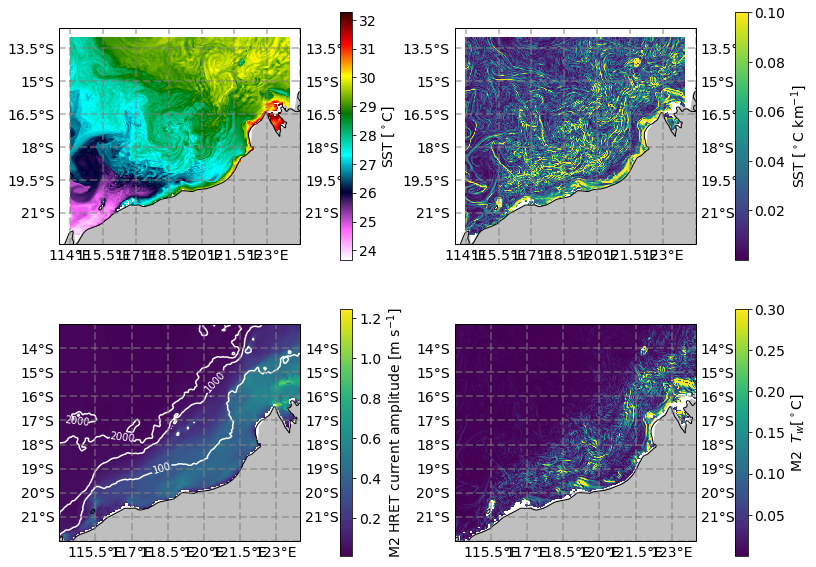

In [71]:
matplotlib.rcParams.update({'font.size': 14})
hc = 1000
pad = 0.12
fig = plt.figure(figsize=(13,10))
#plot SST
ax = make_cartopy(2,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1)
cs = ax.pcolormesh(toplt_zoom.XC,toplt_zoom.YC,toplt_zoom[1,:,:], \
                transform = ccrs.PlateCarree(),cmap=csst)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
cbar.set_label('SST [$^\circ$C]')

#plot Grad SST
ax = make_cartopy(2,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=2)
cs = ax.pcolormesh(toplt_zoom.XC,toplt_zoom.YC,sobel_grad*1000, \
                transform = ccrs.PlateCarree(),vmax=vmax_grad)
cbar = fig.colorbar(cs, ax=ax, pad=pad)
cbar.set_label('SST [$^\circ$C km$^{-1}$]')

#plot wave current

ax = make_cartopy(2,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=3)
toplt_U = np.sqrt(U_out.real**2+V_out.real**2)
cs = ax.imshow(toplt_U, origin='lower', extent=img_extent, transform=ccrs.PlateCarree())
levels=[100,1000,2000]
ccont = ax.contour(lons,lats,hret['h'],levels, extent=img_extent, transform=ccrs.PlateCarree(),colors='w')
plt.clabel(ccont, inline=1, fontsize=10,fmt='%.0f')
#toplt.plot()
#ax.set_title(cst+r'HRET $abs(U^2+V^2)$')
cbar = fig.colorbar(cs, ax=ax, pad=pad)
cbar.set_label(cst+r' HRET current amplitude [m s$^{-1}$]')


#plot wave SST
toplt = np.abs(Tc)
ax = make_cartopy(2,2,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=4)

cs = ax.imshow(toplt, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),vmax=0.3)

cbar = fig.colorbar(cs, ax=ax, pad=pad)
cbar.set_label(cst+  r'  $T_w[^\circ$C]')